In [1]:

import pandas as pd


In [2]:

df = pd.read_csv('Churn_Modelling.csv')

print("Dataset successfully load ho gaya hai!")

Dataset successfully load ho gaya hai!


In [3]:

print("Dataset ki pehli 5 rows:")
print(df.head())

Dataset ki pehli 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.6

In [4]:

print("\nDataset ka summary:")
df.info()


Dataset ka summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:

print("\nNumerical columns ki statistics:")
print(df.describe())


Numerical columns ki statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.4

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [8]:
df_processed['Gender'] = df_processed['Gender'].apply(lambda x: 1 if x == 'Male' else 0)


In [9]:
df_processed = pd.get_dummies(df_processed, columns=['Geography'], drop_first=True)


In [10]:
sns.set_style('whitegrid')

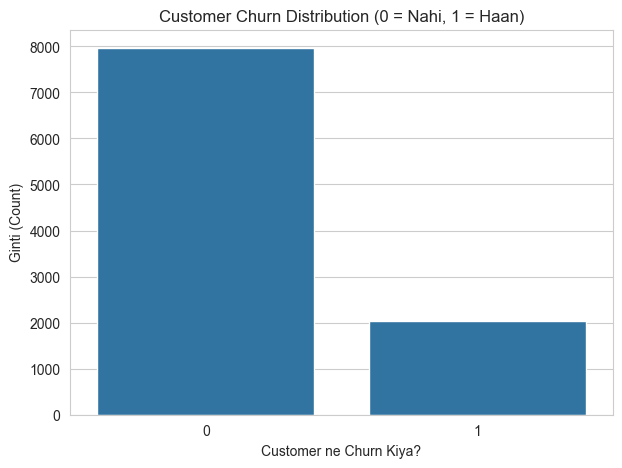

In [12]:
 # Churn ka Distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Exited', data=df_processed)
plt.title('Customer Churn Distribution (0 = Nahi, 1 = Haan)')
plt.xlabel('Customer ne Churn Kiya?')
plt.ylabel('Ginti (Count)')
plt.savefig('churn_distribution.png')


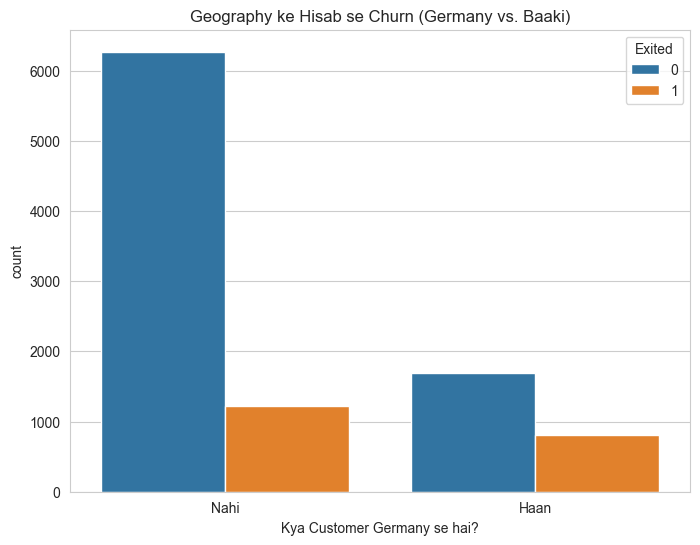

In [13]:
#  Geography ke hisab se Churn
plt.figure(figsize=(8, 6))
# 'Geography' ke liye bane naye columns me se ek ka istemal
sns.countplot(x='Geography_Germany', hue='Exited', data=df_processed)
plt.title('Geography ke Hisab se Churn (Germany vs. Baaki)')
plt.xlabel('Kya Customer Germany se hai?')
plt.xticks([0, 1], ['Nahi', 'Haan'])
plt.savefig('churn_by_geography.png')

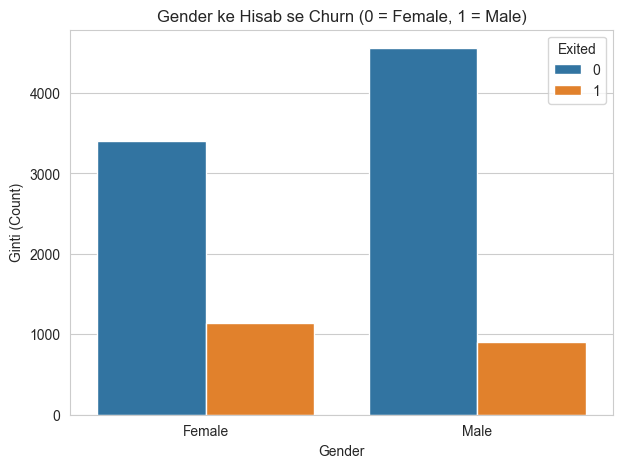

In [14]:
#  Gender ke hisab se Churn
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', hue='Exited', data=df_processed)
plt.title('Gender ke Hisab se Churn (0 = Female, 1 = Male)')
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Ginti (Count)')
plt.savefig('churn_by_gender.png')

In [15]:

# Saaf kiye gaye data ko ek nayi CSV file me save karna
df_processed.to_csv('churn_processed.csv', index=False)

print("Step 2 ka code safaltapurvak execute ho gaya hai.")
print("Saaf kiya hua data 'churn_processed.csv' file me save kar diya gaya hai.")
print("Teen graphs (churn_distribution.png, churn_by_geography.png, churn_by_gender.png) bhi save ho gaye hain.")

Step 2 ka code safaltapurvak execute ho gaya hai.
Saaf kiya hua data 'churn_processed.csv' file me save kar diya gaya hai.
Teen graphs (churn_distribution.png, churn_by_geography.png, churn_by_gender.png) bhi save ho gaye hain.


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [17]:
df = pd.read_csv('churn_processed.csv')
print("Processed data 'churn_processed.csv' safaltapurvak load ho gaya hai.")

Processed data 'churn_processed.csv' safaltapurvak load ho gaya hai.


In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData ko training (80%) aur testing (20%) sets mein baant diya gaya hai.")



Data ko training (80%) aur testing (20%) sets mein baant diya gaya hai.


In [20]:
# Sabhi features ko ek common scale par laana taaki model theek se kaam kare.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Sabhi features ko scale kar diya gaya hai.")

Sabhi features ko scale kar diya gaya hai.


In [21]:
print("\nTeen alag-alag models ko train kiya ja raha hai...")

# Model 1: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
print("1. Logistic Regression model train ho chuka hai.")

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("2. Random Forest model train ho chuka hai.")

# Model 3: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
print("3. Gradient Boosting model train ho chuka hai.")


Teen alag-alag models ko train kiya ja raha hai...
1. Logistic Regression model train ho chuka hai.
2. Random Forest model train ho chuka hai.
3. Gradient Boosting model train ho chuka hai.


In [23]:
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)
gb_preds = gb_model.predict(X_test_scaled)

print("\n Test Set par Models ki Prarambhik Accuracy ")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_preds):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_preds):.4f}")


 Test Set par Models ki Prarambhik Accuracy 
Logistic Regression Accuracy: 0.8080
Random Forest Accuracy: 0.8615
Gradient Boosting Accuracy: 0.8700


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [26]:
print("--- Step 4: Model Evaluation ---\n")

# 1. Classification Reports
# Yeh har model ke liye Precision, Recall aur F1-score dikhata hai.
print("--- Logistic Regression ka Classification Report ---")
print(classification_report(y_test, lr_preds, target_names=['Not Churned (0)', 'Churned (1)']))

print("\n--- Random Forest ka Classification Report ---")
print(classification_report(y_test, rf_preds, target_names=['Not Churned (0)', 'Churned (1)']))

print("\n--- Gradient Boosting ka Classification Report ---")
print(classification_report(y_test, gb_preds, target_names=['Not Churned (0)', 'Churned (1)']))


--- Step 4: Model Evaluation ---

--- Logistic Regression ka Classification Report ---
                 precision    recall  f1-score   support

Not Churned (0)       0.82      0.97      0.89      1593
    Churned (1)       0.59      0.19      0.28       407

       accuracy                           0.81      2000
      macro avg       0.71      0.58      0.59      2000
   weighted avg       0.78      0.81      0.77      2000


--- Random Forest ka Classification Report ---
                 precision    recall  f1-score   support

Not Churned (0)       0.87      0.97      0.92      1593
    Churned (1)       0.77      0.45      0.57       407

       accuracy                           0.86      2000
      macro avg       0.82      0.71      0.74      2000
   weighted avg       0.85      0.86      0.85      2000


--- Gradient Boosting ka Classification Report ---
                 precision    recall  f1-score   support

Not Churned (0)       0.88      0.97      0.92      1593
    Chur


--- Gradient Boosting Model ka Confusion Matrix ---
Gradient Boosting model ka Confusion Matrix 'confusion_matrix_gb.png' file me save ho gaya hai.


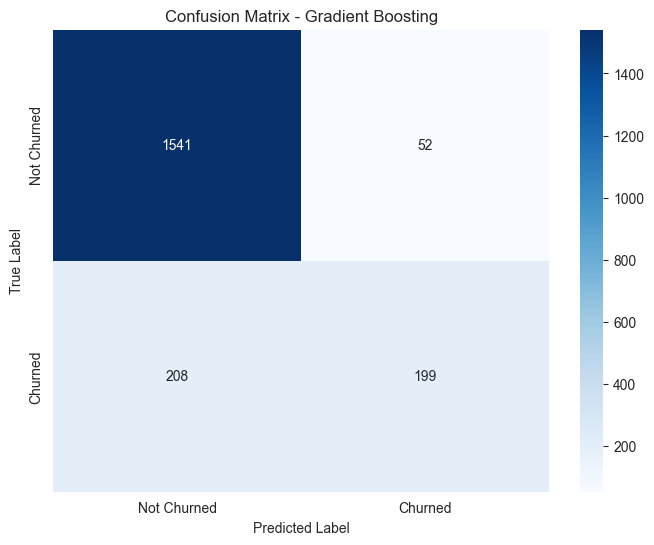

In [27]:
print("\n--- Gradient Boosting Model ka Confusion Matrix ---")
cm = confusion_matrix(y_test, gb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting')
plt.savefig('confusion_matrix_gb.png')
print("Gradient Boosting model ka Confusion Matrix 'confusion_matrix_gb.png' file me save ho gaya hai.")


Sabhi models ka ROC Curve 'roc_curve_comparison.png' file me save kar diya gaya hai.


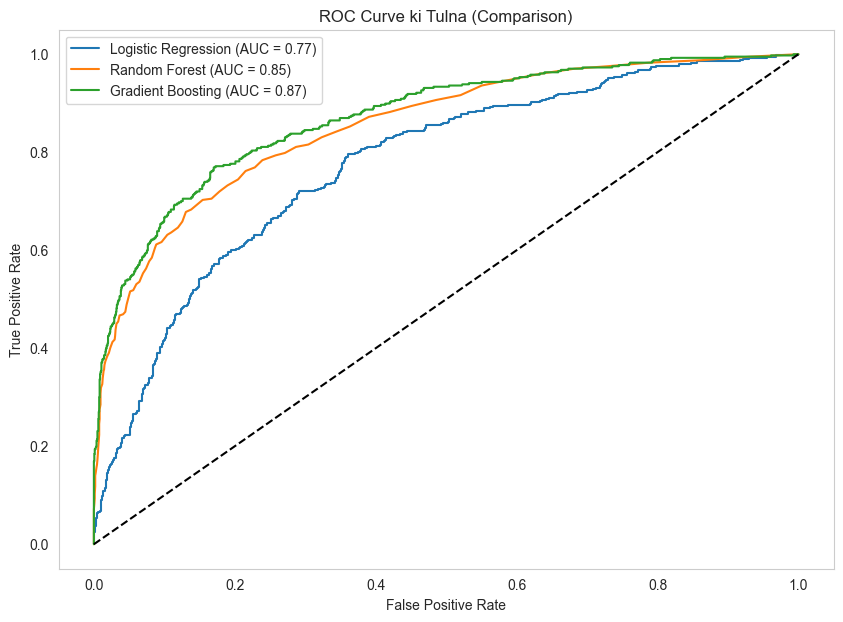

In [31]:
plt.figure(figsize=(10, 7))

# Logistic Regression ke liye ROC
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Random Forest ke liye ROC
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Gradient Boosting ke liye ROC
y_pred_proba_gb = gb_model.predict_proba(X_test_scaled)[:,1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')

plt.plot([0, 1], [0, 1], 'k--') # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ki Tulna (Comparison)')
plt.legend(loc='best')
plt.grid()
plt.savefig('roc_curve_comparison.png')
print("\nSabhi models ka ROC Curve 'roc_curve_comparison.png' file me save kar diya gaya hai.")

In [33]:
import joblib # Library to save our model

In [34]:
# --- Create and Save the Scaler ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print("Scaler has been fitted.")
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved as 'scaler.joblib'")

Scaler has been fitted.
Scaler saved as 'scaler.joblib'


In [35]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
print("\nModel has been trained.")
joblib.dump(model, 'model.joblib')
print("Model saved as 'model.joblib'")



Model has been trained.
Model saved as 'model.joblib'


In [36]:
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.joblib')
print("\nModel columns saved to 'model_columns.joblib'")


Model columns saved to 'model_columns.joblib'


In [37]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, sentence-transformers, sklearn-compat


In [39]:
test_df = X_test.copy()
test_df['Actual_Churn'] = y_test.values

# **Filter the DataFrame to get only the churned customers**
churned_samples = test_df[test_df['Actual_Churn'] == 1]

print("--- Sample Test Data for CHURNED Customers ---")
print("You can use these values to test your web form.\n")

# Print the first 5 samples of churned customers
print(churned_samples.head(5))

--- Sample Test Data for CHURNED Customers ---
You can use these values to test your web form.

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7068          699       0   54       3  111009.32              1          1   
2350          617       0   58       3  119024.75              2          1   
4799          551       1   52       1       0.00              1          0   
6984          588       1   44       8  154409.74              1          1   
3982          614       1   46       4       0.00              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7068               1        155905.79               True            False   
2350               0         35199.24               True            False   
4799               0         63584.55              False            False   
6984               0         49324.03              False            False   
3982               0         74379.57       

In [38]:
test_samples = X_test.head(5).copy()

# Add the actual answers ('y_test') to our sample DataFrame
# This tells you what the correct prediction should be for each sample
test_samples['Actual_Churn'] = y_test.head(5).values

print("--- Sample Test Data for Your Application ---")
print("You can use these values to test your web form.\n")

# Print the sample data
print(test_samples)

--- Sample Test Data for Your Application ---
You can use these values to test your web form.

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
5702          585       1   36       7       0.00              2          1   
3667          525       1   33       4  131023.76              2          0   
1617          557       0   40       4       0.00              2          0   
5673          639       1   34       5  139393.19              2          0   
4272          640       0   34       3   77826.80              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
5702               0         94283.09              False            False   
3667               0         55072.93               True            False   
1617               1        105433.53              False             True   
5673               0         33950.08              False             True   
4272               1        168544.85        

In [40]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy viewing and sorting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("--- Most Important Features ---")
print(feature_importance_df)

--- Most Important Features ---
              Feature  Importance
2                 Age    0.388266
5       NumOfProducts    0.299909
7      IsActiveMember    0.113911
4             Balance    0.089053
9   Geography_Germany    0.055562
0         CreditScore    0.018717
8     EstimatedSalary    0.016668
1              Gender    0.013160
3              Tenure    0.003629
6           HasCrCard    0.000642
10    Geography_Spain    0.000485


C:\Users\Dell\AppData\Local\Temp\ipykernel_3828\2376187820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')



Feature importance plot has been saved as 'feature_importance.png'


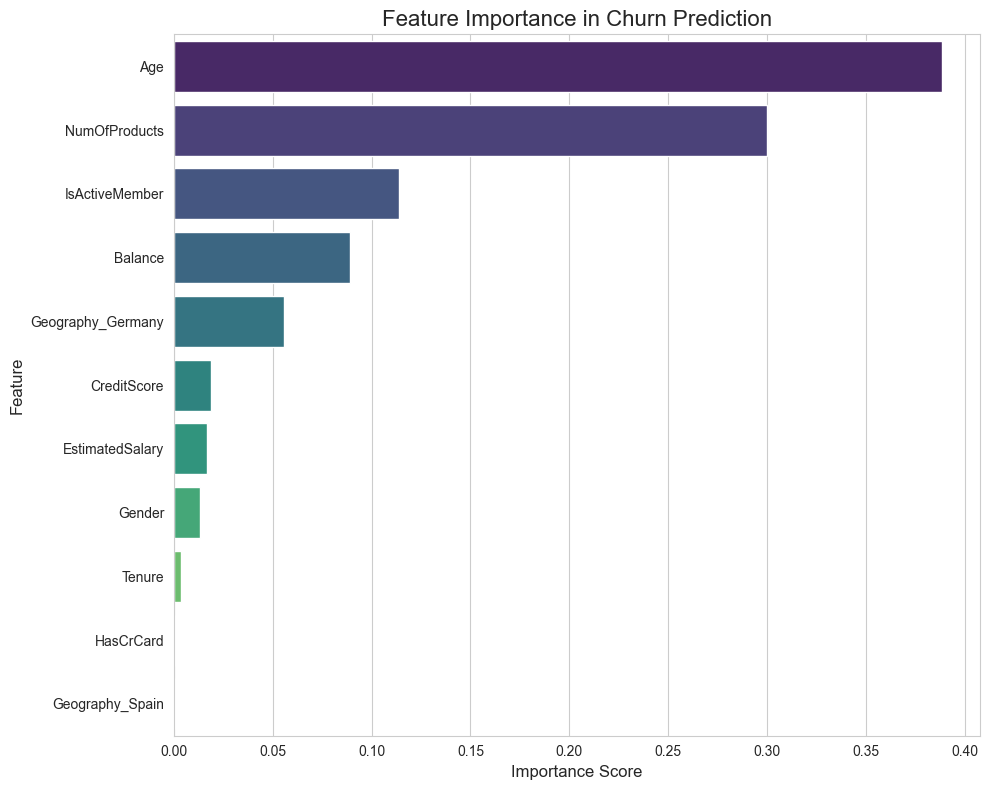

In [41]:
# --- Create a Bar Plot ---
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Churn Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png')

print("\nFeature importance plot has been saved as 'feature_importance.png'")